# K-Nearest Neighbors (KNN) Implementation 
----
This code allows you to select a school district and locate its K nearest neighbors. 
 

## Importing packages, lists, and functions 

Importing Necessary Packages 

In [1]:
import os 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
from sklearn.manifold import MDS
from scipy.cluster.hierarchy import linkage, dendrogram
import geopandas as gpd
import textwrap
from matplotlib.patches import ConnectionPatch
from scipy.spatial import Voronoi


Importing demographic buckets from Demographic_Buckets.py file (Demographic buckets to run model on)

In [2]:
os.chdir(r"C:\Users\mmath\OneDrive\Desktop\Capstone\HERC_Sp25\4_Data_Modeling\4.2_KNN_Clustering")
from Demographic_Buckets import student_teacher_ratio
from Demographic_Buckets import student_count
from Demographic_Buckets import staff_count
from Demographic_Buckets import race_ethnicity_percent
from Demographic_Buckets import economically_disadvantaged
from Demographic_Buckets import special_ed_504
from Demographic_Buckets import language_education_percent
from Demographic_Buckets import special_populations_percent
from Demographic_Buckets import gifted_students
from Demographic_Buckets import district_identifiers

Importing modeling functions from the KNN_Model.py file (containing all functions used for this analysis)

In [3]:
from KNN_Model import calculate_missing_percentage
from KNN_Model import drop_columns
from KNN_Model import preprocess_data
from KNN_Model import knn_distance
from KNN_Model import knn_cosine
from KNN_Model import knn_canberra
from KNN_Model import find_nearest_districts
from KNN_Model import get_neighbor_data

Importing diagnostic plot functions from the KNN_Diagnostic_Plots.py file (containing all functions used for this analysis)

In [4]:
from KNN_Diagnostic_Plots import plot_texas_districts
from KNN_Diagnostic_Plots import plot_race_ethnicity_stacked_bar
from KNN_Diagnostic_Plots import plot_class_size_k6_bar
from KNN_Diagnostic_Plots import plot_special_ed_504_bar

## Reading in Data & Cleaning

In [5]:
#Reading in the data
os.chdir(r"C:\Users\mmath\OneDrive\Desktop\Capstone\HERC_Sp25\4_Data_Modeling\4.2_KNN_Clustering")
df = pd.read_csv(r"C:\Users\mmath\OneDrive\Desktop\Capstone\HERC_Sp25\0_Datasets\1.7Master_Files\Individual Year Files_Take2\merged_2023.csv")
distgrad = pd.read_csv(r"C:\Users\mmath\OneDrive\Desktop\Capstone\HERC_Sp25\0_Datasets\1.6Data2023\District\clean_data\distgrad_2023_clean.csv")
distprof = pd.read_csv(r"C:\Users\mmath\OneDrive\Desktop\Capstone\HERC_Sp25\0_Datasets\1.6Data2023\District\clean_data\distprof_2023_clean.csv")
df = df[df['Charter School (Y/N)'] == 'N']
demographic_df = df[student_teacher_ratio + student_count + staff_count + race_ethnicity_percent + economically_disadvantaged +
                    special_ed_504 + language_education_percent + special_populations_percent + gifted_students +
                    district_identifiers]

# Select only numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Replace negative values with NaN only in numeric columns
df[numeric_cols] = df[numeric_cols].mask(df[numeric_cols] < 0, np.nan)


#plt.hist(calculate_missing_percentage(demographic_df) / 100)
#plt.title("Histogram of percentage of NA values in columns within demographic attributes")
#demographic_df


Key takaways, the demographic data contains very few columns with a lot of NAs! The outcome oriented data on the other hand varies slightly. Regardless, the data science portion (fitting a knn model) will occur on mostly complete data

## Fitting model on Houston ISD to find 5 nearest neighbors for different distance metrics
---
Target District: Houston ISD (101912)  
Feature buckets used:   
* race_ethnicity_percent  
* student_teacher_ratio
* special_ed_504   


Number of Neighbors: 5   
Imputation Strategy: Median  


In [6]:
distance_metrics = ['euclidean', 'manhattan', 'mahalanobis', 'cosine', 'canberra']
selected_features = race_ethnicity_percent +  student_teacher_ratio + special_ed_504

for distance_metric in distance_metrics: 
    print(f"Distance Metric: {distance_metric}")
    knn_model = find_nearest_districts(df, 101912, selected_features, 5, distance_metric, "median")
    print(knn_model)
    plot_texas_districts(knn_model, df)
    plot_race_ethnicity_stacked_bar(knn_model, df)
    plot_special_ed_504_bar(knn_model, df)
    
    

Distance Metric: euclidean
      DISTRICT_id       DISTNAME
532        101912    HOUSTON ISD
524        101902     ALDINE ISD
1093       227907      MANOR ISD
541        101924    SHELDON ISD
1137       237902  HEMPSTEAD ISD


HTTPError: HTTP Error 403: Forbidden

In [ ]:
possible_features = [
    'student_teacher_ratio',
    'student_count',
    'staff_count',
    'race_ethnicity_percent',
    'economically_disadvantaged',
    'special_ed_504',
    'language_education_percent',
    'special_populations_percent',
    'gifted_students',
    'district_identifiers'
]

distance_metrics = [
    'euclidean',
    'manhattan',
    'mahalanobis',
    'cosine',
    'canberra']

nearest_neighbors = find_nearest_districts(df, 101912, student_teacher_ratio, 5, "Euclidean", "median") 
neighbors_df = get_neighbor_data(df, student_teacher_ratio, nearest_neighbors)
neighbors_df[neighbors_df.columns.difference(district_identifiers)]


#for distance_metric in distance_metrics: 
#    #print(f"Distance Metric: {distance_metric}")
#    knn_model = find_nearest_districts(df, 101912, selected_features, 5, distance_metric, "median")
#    test = get_neighbor_data(df, selected_features, knn_model)
#    print(test)
#    #plot_texas_districts(knn_model, df)
    #plot_race_ethnicity_stacked_bar(knn_model, df)
    #plot_special_ed_504_bar(knn_model, df)

,DISTNAME_x,DISTNAME_y,District 2023 Staff: Teacher Student Ratio
0,ELGIN ISD,ELGIN ISD,17.6
1,LAMAR CISD,LAMAR CISD,17.8
2,HOUSTON ISD,HOUSTON ISD,18.0
3,EAGLE PASS ISD,EAGLE PASS ISD,17.4
4,WILLIS ISD,WILLIS ISD,17.9


,DISTRICT_id,DISTNAME
532,101912,HOUSTON ISD
524,101902,ALDINE ISD
1093,227907,MANOR ISD
541,101924,SHELDON ISD
1137,237902,HEMPSTEAD ISD


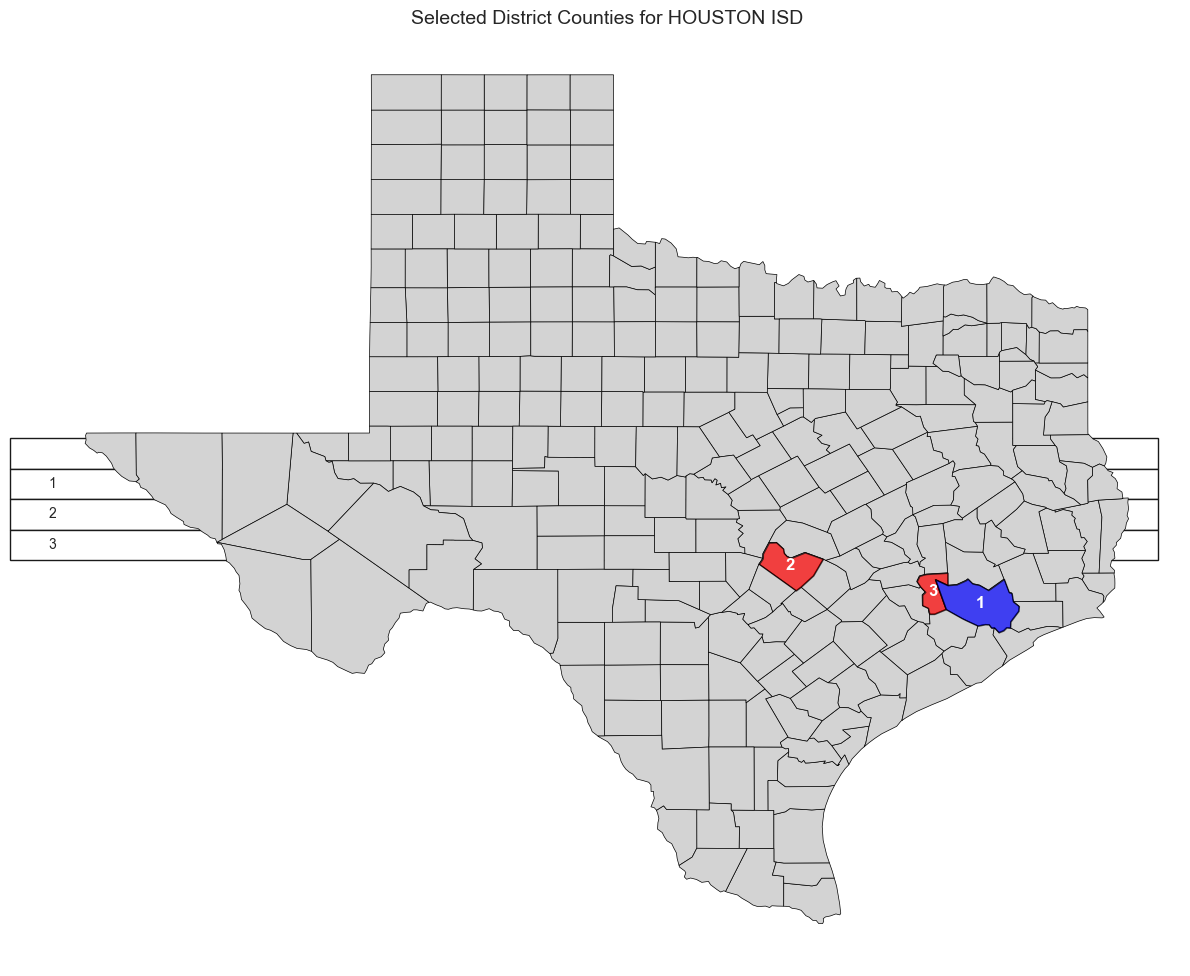

In [29]:
import geopandas as gpd
import matplotlib.pyplot as plt

def plot_texas_districts4(neighbors, df):
    """
    Plots selected school districts on a Texas map.
    Each county that contains one or more selected districts is numbered,
    and a legend table on the right lists the county number, county name,
    and district(s) in that county.
    
    Parameters:
    - neighbors (DataFrame): Contains neighbor district IDs.
    - df (DataFrame): Contains 'DISTRICT_id', 'DISTNAME', and 'CNTYNAME' columns.
    """
    # Get the list of selected district IDs
    district_ids = list(neighbors["DISTRICT_id"])
    if not district_ids:
        print("No district IDs provided.")
        return

    # Filter for the selected districts
    selected_districts = df[df['DISTRICT_id'].isin(district_ids)]
    if selected_districts.empty:
        print("No matching districts found. Check the district IDs.")
        return

    # Determine the main district and its county (using the first district in the list)
    main_district_info = df[df['DISTRICT_id'] == district_ids[0]]
    main_district_name = (main_district_info.iloc[0]["DISTNAME"]
                          if not main_district_info.empty else "Unknown District")
    main_county = df[df['DISTRICT_id'] == district_ids[0]]["CNTYNAME"].iloc[0].upper()

    # Load Texas counties shapefile from Census
    #shapefile_url = "https://www2.census.gov/geo/tiger/GENZ2020/shp/cb_2020_us_county_20m.zip"
    texas_counties = gpd.read_file(r"C:\Users\mmath\OneDrive\Desktop\Capstone\HERC_Sp25\0_Datasets\2.1Geometry\cb_2020_us_county_20m.zip")
    texas_counties = texas_counties[texas_counties["STATEFP"] == "48"]

    # Group selected districts by county.
    # Convert county names to uppercase for matching with the shapefile.
    county_to_districts = (selected_districts.groupby("CNTYNAME")["DISTNAME"]
                           .apply(list).to_dict())
    county_to_districts = {k.upper(): v for k, v in county_to_districts.items()}

    # Select only counties that have selected districts
    selected_counties = texas_counties[texas_counties["NAME"].str.upper().isin(county_to_districts.keys())]

    # Assign a unique number to each county
    county_numbers = {}
    for i, county in enumerate(sorted(county_to_districts.keys()), start=1):
        county_numbers[county] = i

    # Set up the figure and leave space on the right for the legend table
    fig, ax = plt.subplots(figsize=(12, 10))
    plt.subplots_adjust(right=0.65)

    # Plot all Texas counties in light gray
    texas_counties.plot(ax=ax, color="lightgray", edgecolor="black", linewidth=0.5)

    # Plot selected counties with a fill color:
    # Blue if it's the main county, red otherwise.
    for idx, row in selected_counties.iterrows():
        county_name = row["NAME"].upper()
        if county_name in county_numbers:
            color = "blue" if county_name == main_county else "red"
            gpd.GeoSeries(row["geometry"]).plot(ax=ax, color=color, edgecolor="black", linewidth=1, alpha=0.7)
            # Annotate the county centroid with its assigned number
            centroid = row["geometry"].centroid
            ax.text(centroid.x, centroid.y, str(county_numbers[county_name]), 
                    fontsize=12, fontweight='bold', color="white", ha='center', va='center')

    # Build legend data: each row is [number, county, district(s)]
    legend_data = []
    for county, num in sorted(county_numbers.items(), key=lambda x: x[1]):
        district_names = ", ".join(county_to_districts[county])
        # Use title case for better readability
        legend_data.append([num, county.title(), district_names])
    
    # Create a table legend on the right side of the plot
    table = plt.table(cellText=legend_data, 
                      colLabels=["#", "County", "District(s)"],
                      cellLoc='left', 
                      loc='center right')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    
    ax.set_title(f"Selected District Counties for {main_district_name}", fontsize=14)
    ax.axis("off")
    plt.tight_layout()
    plt.show()

model1 = find_nearest_districts(df, 101912, selected_features, 5, 'Euclidean', "median")
#model1
plot_texas_districts4(model1, df)




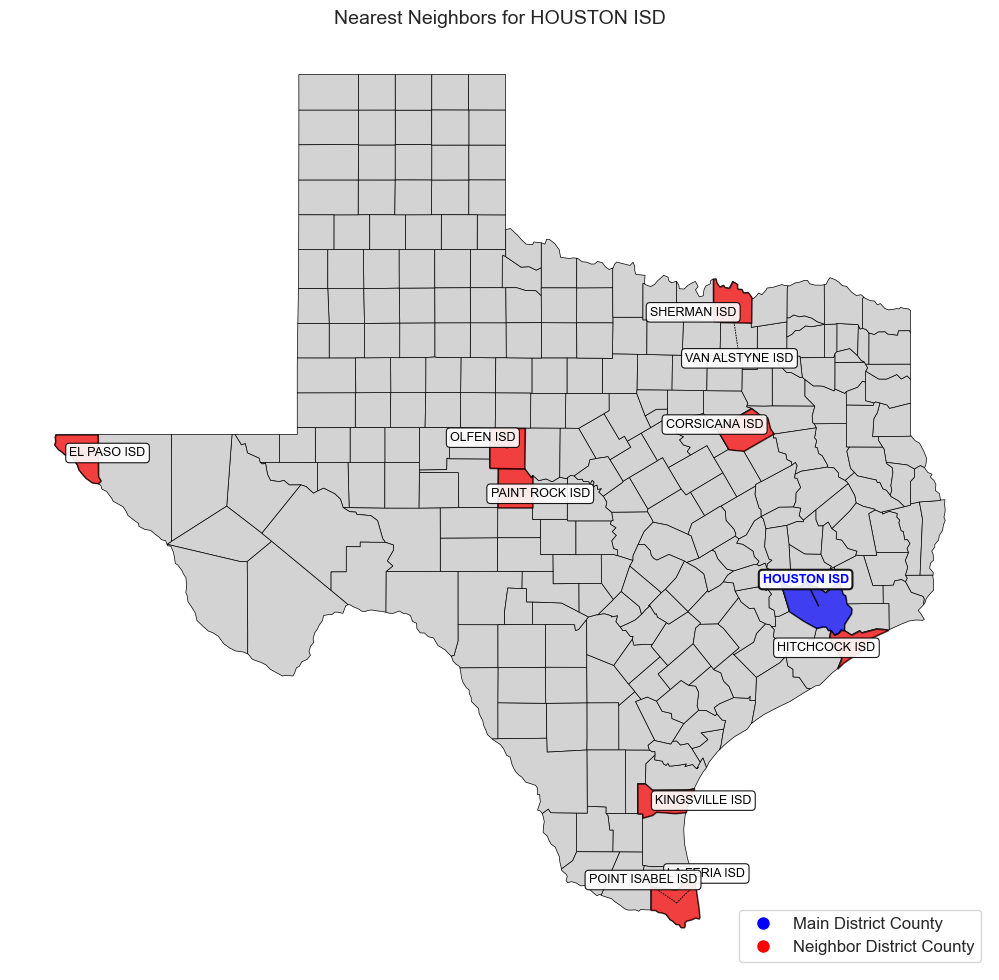

,DISTRICT_id,DISTNAME,metric
532,101912,HOUSTON ISD,Method 1
443,91906,SHERMAN ISD,Method 1
228,48903,PAINT ROCK ISD,Method 1
421,84908,HITCHCOCK ISD,Method 1
966,200906,OLFEN ISD,Method 1
532,101912,HOUSTON ISD,Method 2
443,91906,SHERMAN ISD,Method 2
421,84908,HITCHCOCK ISD,Method 2
228,48903,PAINT ROCK ISD,Method 2
865,175903,CORSICANA ISD,Method 2


In [21]:
houstonISD = 101912
from KNN_Diagnostic_Plots import plot_economically_disadvantaged_side_by_side, plot_texas_districts
from compareNeighbors import compareMetrics, comparePlotter, plot_demographic_feature_presence2
#econ_dis = comparePlotter(houstonISD, plot_func = plot_economically_disadvantaged_side_by_side, df = df, selected_features = economically_disadvantaged)
#econ_dis
#test = compareMetrics(houstonISD, df = df, selected_features = gifted_students + race_ethnicity_percent + student_count + staff_count + economically_disadvantaged + language_education_percent + special_populations_percent + special_ed_504 + student_teacher_ratio)
comparePlotter(houstonISD, plot_func = plot_texas_districts2, df = df, selected_features = economically_disadvantaged)

#comparePlotter(houstonISD, plot_func = plot_economically_disadvantaged_side_by_side, df = df, selected_features = economically_disadvantaged)


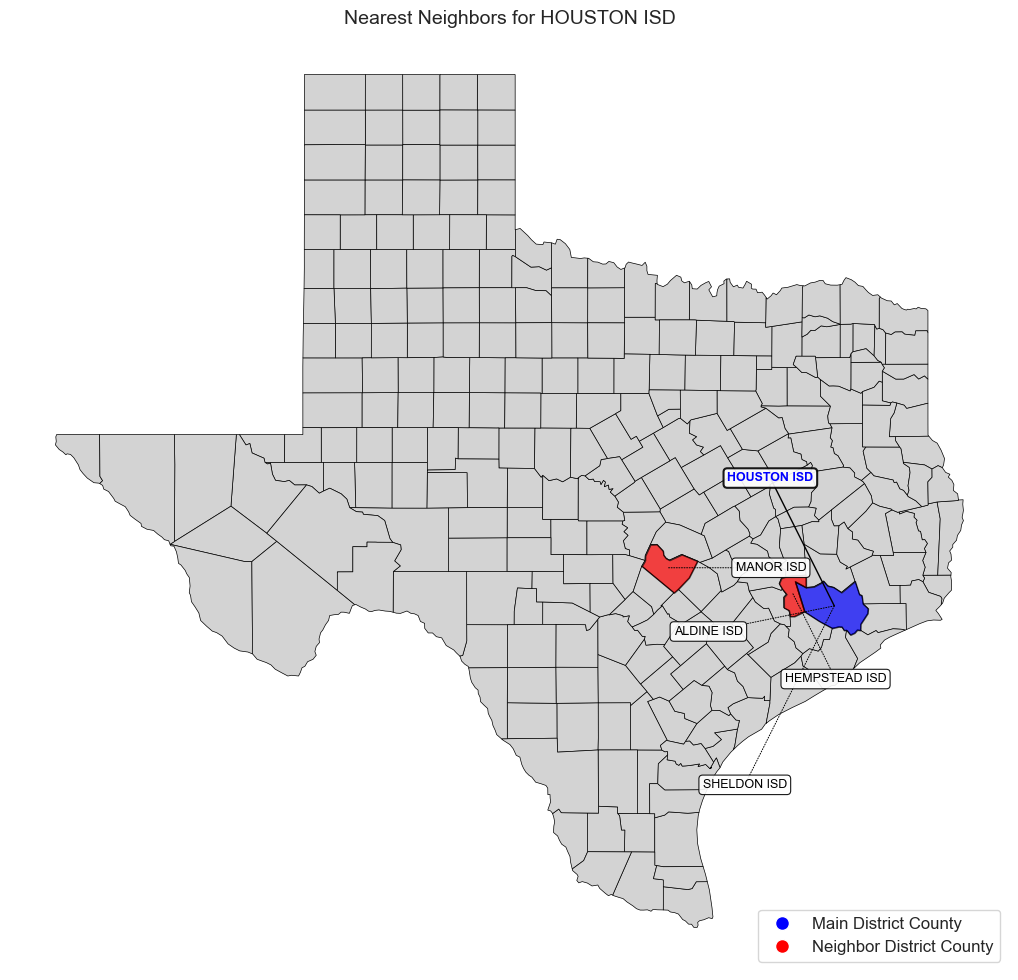

In [18]:
plot_texas_districts2(model1, df)

In [32]:
import folium
import geopandas as gpd
import pandas as pd

def interactive_texas_districts6(neighbors, df):
    """
    Creates an interactive map of Texas counties for the selected school districts.
    When you hover over a county, a tooltip displays the county name and the district(s)
    that belong to that county.
    
    Parameters:
    - neighbors (DataFrame): Contains neighbor district IDs.
    - df (DataFrame): Contains 'DISTRICT_id', 'DISTNAME', and 'CNTYNAME' columns.
    
    Returns:
    - A Folium map object that you can display in a Jupyter Notebook or save as HTML.
    """
    # Get selected district IDs
    district_ids = list(neighbors["DISTRICT_id"])
    if not district_ids:
        print("No district IDs provided.")
        return

    # Filter the DataFrame for selected districts
    selected_districts = df[df['DISTRICT_id'].isin(district_ids)]
    if selected_districts.empty:
        print("No matching districts found. Check the district IDs.")
        return

    # Determine main district's county (using the first district in the list)
    main_county = df[df['DISTRICT_id'] == district_ids[0]]["CNTYNAME"].iloc[0].upper()

    # Group selected districts by county (make keys uppercase to match shapefile)
    county_to_districts = (selected_districts
                           .groupby("CNTYNAME")["DISTNAME"]
                           .apply(list)
                           .to_dict())
    # Convert district lists to a comma-separated string for display
    county_to_districts = {k.upper(): ", ".join(v) for k, v in county_to_districts.items()}

    # Load Texas counties shapefile (from Census)
    #shapefile_url = "https://www2.census.gov/geo/tiger/GENZ2020/shp/cb_2020_us_county_20m.zip"
    texas_counties = gpd.read_file(r"C:\Users\mmath\OneDrive\Desktop\Capstone\HERC_Sp25\0_Datasets\2.1Geometry\cb_2020_us_county_20m.zip")
    texas_counties = texas_counties[texas_counties["STATEFP"] == "48"]

    # Create a new column in the GeoDataFrame with uppercase county names for merging
    texas_counties['NAME_UPPER'] = texas_counties['NAME'].str.upper()
    # Map the district info to the counties using the new key
    texas_counties['districts'] = texas_counties['NAME_UPPER'].map(county_to_districts)

    # Filter to only the counties that have district info (i.e. are in the selected set)
    selected_counties = texas_counties[texas_counties['districts'].notna()]

    # Add a column to designate color: blue for the main county, red for others
    selected_counties['color'] = selected_counties['NAME_UPPER'].apply(
        lambda x: 'blue' if x == main_county else 'red'
    )

    # Convert the selected counties GeoDataFrame to GeoJSON
    geojson_data = selected_counties.to_json()

    # Create a Folium map centered in Texas
    m = folium.Map(location=[31.0, -99.0], zoom_start=6, tiles="cartodbpositron")

    # Define a style function that uses the 'color' property in each feature
    def style_function(feature):
        return {
            'fillColor': feature['properties']['color'],
            'color': 'black',
            'weight': 1,
            'fillOpacity': 0.7,
        }

    # Add the GeoJSON layer with a tooltip that shows the county and district info
    folium.GeoJson(
        geojson_data,
        style_function=style_function,
        tooltip=folium.GeoJsonTooltip(
            fields=['NAME', 'districts'],
            aliases=['County:', 'Districts:'],
            localize=True
        )
    ).add_to(m)

    return m

# Example usage:
# m = interactive_texas_districts(neighbors_df, districts_df)
# m.save("interactive_map.html")  # or simply display m in a Jupyter Notebook

interactive_texas_districts6(model1, df)

c:\Users\mmath\AppData\Local\Programs\Python\Python312\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [31]:
pip install folium

Note: you may need to restart the kernel to use updated packages.
